## 2. Fasea: Algoritmoak diseinatzen

#### Julen Etxaniz eta Aitor Zubillaga

Community Detection proiektuaren 1. fasea entregatu duzue, eta feedback-a jaso ere. Klasean hainbat algoritmo ikusi ditugu, batzuk soluzio bakarrean oinarritutakoak, beste batzuk aldiz, populazio bat erabiltzen dutenak. Horiez gain, hibridatzeko teknikak ere ikusi ditugu. Bigarrengo fase honetan, bi algoritmo diseinatu beharko dituzue, bata soluzio bakarrean oinarritutakoa, eta bestea poblazionala. Ez hori bakarrik, bi algoritmoetako batek operadore probabilistikoak erabili beharko ditu, Estimation of Distribution Algorithms (EDAk) edo Ant Colony Optimization (ACO)-ek egiten duten bezala. Algoritmoen helburua, komunitate kopuru jakin bat emanik, modularity maximizatzen duen komunitate banaketa (soluzioa) bilatzen saiatzea da.

Errepasatu gaitegian zehar ikusi ditugun algoritmo guztiak, eta horiek kontuak izanik, libre zarete nahi dituzuen diseinuak sortzeko, baita ere hibridoak! Adi! Egiten duzuen aukeraketa argudiatu egin beharko duzue.


#### Entregablea

Bigarrengo fasea ebaluatu ahal izateko, notebook honetan bertan algoritmoen diseinua eta implementazioa proposatu beharko duzue. Gogoratu algoritmo bat azaltzeko modurik errezena diagrama bat egitea dela. Adi! Atal bakoitzean hartutako erabakiak eta garatutako metodoak egoki argudiatu beharko dituzue. Ez argudiatzeak edo lana garaiz ez entregatzeak penalizazioa jasoko dute ebaluagarria den proiektuaren zati honetan. eGelan zehazten dira notebook-a igotzeko <b>egun eta orduak</b>.

Momentuz, ez daukazue algoritmoen exekuzio eta konparaketak egin behar. Hirugarren fasean, esperimentazioaren inguruko baldintzak emango dizkizuet, eta, horrez gain, txostenaren idazketa burutu beharko duzue.

```python
## Hemendik aurrera, intuizioa da nagusi...

Nire aukeraketa, UMDA bat swap-LS batekin eta metodo eraikitzaile batekin.

Eta bestea, ILS bat, metodo eraikitzaile estokastiko batekin eta,
```



## Grafoa sortu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection

/content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection


In [5]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

def sortu_grafoa():
    # Get data
    connect = sqlite3.connect('data/database.sqlite')
    query = """
    SELECT pa.paper_id, pa.author_id, a.name
    FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
    JOIN authors as a ON pa.author_id = a.id
    WHERE p.Year BETWEEN '2014' AND '2015'
    """
    df = pd.read_sql(query, connect)

    # Have a look at data
    df.head(10)

    # Initialize graph
    G = nx.Graph()

    # Transform
    # Autorearen IDa erabili beharrean erabili izena.
    for p, a in df.groupby('paper_id')['name']: 
        for u, v in itertools.combinations(a, 2):
            if G.has_edge(u, v):
                G[u][v]['weight'] +=1
            else:
                G.add_edge(u, v, weight=1)
                
    # Print graph size
    print('Autore kopurua grafoan:', G.number_of_nodes())
    print('Elkarlan kopurua grafoan:', G.number_of_edges())
    
    return G

def bistaratu_grafoa(G):
    plt.figure(figsize=(13, 9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75', label=True)
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    plt.show()

    plt.axis('off')
    plt.show()

In [42]:
G = sortu_grafoa()

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


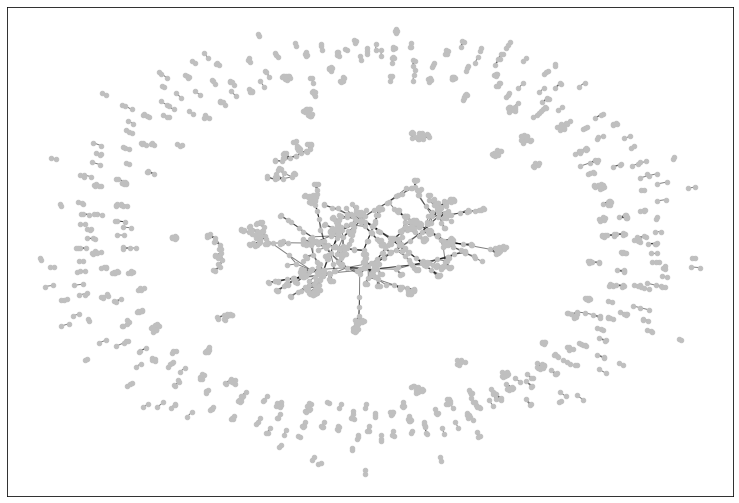

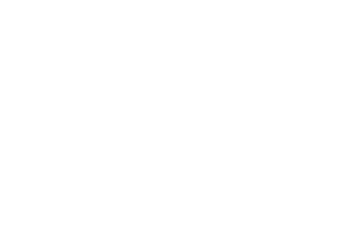

In [43]:
bistaratu_grafoa(G)

## Helburu-funtzioa

In [6]:
import numpy as np
# 50 komunitate ausaz
soluzioa_1 = np.random.randint(50, size=1843)
# 10 komunitate ausaz
soluzioa_2 = np.random.randint(10, size=1843)
print(list(soluzioa_1))
print(list(soluzioa_2))

[7, 7, 11, 14, 31, 38, 5, 0, 6, 16, 6, 29, 44, 43, 38, 30, 19, 3, 7, 46, 24, 47, 33, 11, 17, 11, 36, 29, 42, 40, 13, 21, 44, 41, 37, 21, 44, 36, 42, 47, 30, 11, 26, 24, 46, 29, 10, 40, 1, 49, 29, 24, 15, 25, 15, 27, 32, 31, 7, 11, 49, 19, 7, 4, 10, 11, 47, 15, 28, 19, 44, 28, 0, 0, 45, 35, 40, 43, 32, 20, 33, 33, 34, 16, 37, 31, 6, 3, 29, 15, 47, 20, 15, 45, 32, 36, 18, 49, 41, 24, 17, 37, 12, 6, 39, 23, 26, 7, 20, 26, 2, 17, 2, 23, 36, 22, 6, 40, 12, 25, 32, 11, 15, 32, 9, 49, 46, 19, 16, 19, 32, 15, 34, 34, 46, 46, 37, 29, 33, 38, 47, 39, 17, 0, 34, 7, 19, 46, 9, 32, 35, 25, 8, 24, 32, 11, 11, 21, 9, 44, 20, 15, 36, 7, 35, 19, 19, 33, 43, 21, 31, 46, 11, 8, 3, 2, 33, 10, 47, 25, 26, 9, 6, 28, 27, 19, 21, 43, 14, 15, 32, 36, 1, 40, 17, 5, 9, 24, 41, 14, 32, 15, 0, 31, 4, 25, 25, 25, 20, 45, 10, 11, 47, 46, 28, 16, 12, 34, 3, 13, 4, 28, 15, 42, 21, 3, 42, 22, 43, 12, 9, 49, 47, 18, 38, 16, 1, 34, 26, 42, 28, 11, 16, 13, 21, 41, 22, 27, 9, 3, 44, 25, 32, 28, 23, 29, 15, 16, 21, 9, 12, 4

In [15]:
import community
from collections import defaultdict

### Helburu-funtzioa
def modularity(G, partition, weight='weight'):
    weights = defaultdict(float)
    degrees = defaultdict(float)
    sum = G.size(weight=weight)
    modularity = 0

    for node in G:
        community = partition[node]
        degrees[community] += G.degree(node, weight=weight)
        for neighbour, data in G[node].items():
            if partition[neighbour] == community:
                if neighbour == node: # 4 nodes have self edges
                    weights[community] += data[weight] * 2
                else:
                    weights[community] += data[weight]

    for community in set(partition.values()):
        modularity += (weights[community] / (2 * sum)) - (degrees[community] / (2 * sum)) ** 2
    return modularity

## Gure inplementazioa
partition1 = dict(zip(G.nodes, soluzioa_1))
partition2 = dict(zip(G.nodes, soluzioa_2))

print("Gure helburu-funtzioa:")
print("1. soluzioaren modularitatea:", modularity(G, partition1))
print("2. soluzioaren modularitatea:", modularity(G, partition2))
print("Community moduluko modularity:")
print("1. soluzioaren modularitatea:", community.modularity(partition1, G))
print("2. soluzioaren modularitatea:", community.modularity(partition2, G))

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215
Gure helburu-funtzioa:
1. soluzioaren modularitatea: -0.0038977594319191135
2. soluzioaren modularitatea: 0.0017711664690531238
Community moduluko modularity:
1. soluzioaren modularitatea: -0.0038977594319191135
2. soluzioaren modularitatea: 0.0017711664690531238


## Random Search

In [30]:
def random_search(G, num_solutions, count):
    size = G.number_of_nodes()
    best_solution = np.random.randint(count, size=size)
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    for i in range(num_solutions-1):
        solution = np.random.randint(count, size=size)
        partition = dict(zip(G.nodes, best_solution))
        fitness = modularity(G, best_partition)
        if fitness > best_fitness:
            best_fitness = fitness
            best_solution = solution
    return (best_fitness, best_solution, num_solutions)

## 1. Local Search

https://www.sciencedirect.com/science/article/pii/S0378437119301402?casa_token=8HvHlfHWvXkAAAAA:uhL8V5PBT2QMlSptsIvYJedrCHGRjeZBuvVx-oBYMwJDERz9n0Olp2nh6YVrcFMo3hlxJytWCWs

https://www.worldscientific.com/doi/abs/10.1142/S0217979220500137

### Swap

In [25]:
def swap(solution, i, j):
    solution[i], solution[j] = solution[j], solution[i]
    return solution

def swap_neighbours(solution):
    neighbours = []
    size = len(solution)
    for i in range(size):
        for j in range(i+1, size):
            neighbours.append(swap(solution[:], i, j))
    return neighbours

def best_first_swap(G, best_solution, best_fitness, evals, max_evals):
    improve = False
    size = len(best_solution)
    for i in range(size):
        for j in range(i+1, size):
            solution = swap(best_solution[:], i, j)
            partition = dict(zip(G.nodes, solution))
            fitness = modularity(G, partition)
            evals += 1
            if fitness > best_fitness:
                improve = True
                return (fitness, solution, evals, improve)
            if evals == max_evals:
                return (best_fitness, best_solution, evals, improve)
    return (best_fitness, best_solution, evals, improve)

def local_search_swap(G, max_evals, count):
    size = G.number_of_nodes()
    best_solution = np.random.randint(count, size=size)
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    improve = True
    evals = 1
    while evals < max_evals and improve:
        best_fitness, best_solution, evals, improve = best_first_swap(G, best_solution, best_fitness, evals, max_evals)
        
    return (best_fitness, best_solution, evals)

### Insert

In [24]:
def insert(solution, i, j):
    solution.insert(j, solution.pop(i))
    return solution

def insert_neighbours(solution):
    neighbours = []
    size = len(solution)
    for i in range(size):
        for j in list(range(0, i-1)) + list(range(i+1, size)):
            neighbours.append(insert(solution[:], i, j))
    return neighbours

def best_first_insert(G, best_solution, best_fitness, evals, max_evals):
    improve = False
    size = len(best_solution)
    for i in range(size):
        for j in list(range(0, i-1)) + list(range(i+1, size)):
            solution = insert(best_solution[:], i, j)
            partition = dict(zip(G.nodes, solution))
            fitness = modularity(G, partition)
            evals += 1
            if fitness > best_fitness:
                improve = True
                return (fitness, solution, evals, improve)
            if evals == max_evals:
                return (best_fitness, best_solution, evals, improve)
    return (best_fitness, best_solution, evals, improve)

def local_search_insert(G, max_evals, count):
    size = G.number_of_nodes()
    best_solution = np.random.randint(count, size=size)
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    improve = True
    evals = 1
    while evals < max_evals and improve:
        best_fitness, best_solution, evals, improve = best_first_insert(G, best_solution, best_fitness, evals, max_evals)
        
    return (best_fitness, best_solution, evals)

## Local Search vs Random Search

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import time as tm

# Egin exekuzioak budget desberdinetarako: 10, 100, 1000, 10000...
def run_search(function, count, budget=4, repetitions=5):
    list_budget = []
    list_fit = []
    list_time = []
    for exp in range(1, budget):
        budget=10**exp
        avg_fit = 0
        avg_time = 0
        for rep in tqdm(range(repetitions), position=0, leave=True):
            start = tm.time()
            (fitness, sol, evals) = function(G, budget, count)
            end = tm.time()
            avg_time += end - start
            avg_fit += fitness
        avg_fit = avg_fit/repetitions
        avg_time = avg_time/repetitions
        print()
        print("Budget:", budget, " Average fitness:", avg_fit, " Average time:", avg_time)
        list_budget.append(budget)
        list_fit.append(avg_fit)
        list_time.append(avg_time)
    return list_budget, list_fit, list_time

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


In [45]:
list_budget, list_fit_ls_swap, list_time_ls_swap = run_search(local_search_swap, 50, budget=7, repetitions=1)

  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 10  Average fitness: 0.0015119315096660637  Average time: 0.28260278701782227


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.0008875037961739785  Average time: 1.845519781112671


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 1000  Average fitness: 0.002410427456545454  Average time: 17.848288774490356


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 10000  Average fitness: 0.002077925113460243  Average time: 184.0742359161377


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 100000  Average fitness: 0.01191001572081866  Average time: 1826.9047400951385


KeyboardInterrupt: ignored

In [36]:
list_budget, list_fit_ls_swap, list_time_ls_swap = run_search(local_search_swap, 50)

  0%|          | 0/5 [00:00<?, ?it/s]


Budget: 10  Average fitness: 0.0009643344346732801  Average time: 0.19366755485534667


  0%|          | 0/5 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.001793583918409964  Average time: 1.7899894714355469


100%|██████████| 5/5 [01:29<00:00, 17.95s/it]


Budget: 1000  Average fitness: 0.0038906492675223046  Average time: 17.95327401161194


In [37]:
list_budget, list_fit_ls_ins, list_time_ls_ins = run_search(local_search_swap, 50)

  0%|          | 0/5 [00:00<?, ?it/s]


Budget: 10  Average fitness: -0.0006911243245752462  Average time: 0.19060859680175782


  0%|          | 0/5 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.0008219758672847763  Average time: 1.8100136280059815


100%|██████████| 5/5 [01:29<00:00, 17.95s/it]


Budget: 1000  Average fitness: 0.00238553370855387  Average time: 17.94689087867737


In [38]:
list_budget, list_fit_rs, list_time_rs = run_search(random_search, 50)

  0%|          | 0/5 [00:00<?, ?it/s]


Budget: 10  Average fitness: -0.00103210165671734  Average time: 0.1874666690826416


  0%|          | 0/5 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.00010917780020339926  Average time: 1.8143496990203858


100%|██████████| 5/5 [01:30<00:00, 18.04s/it]


Budget: 1000  Average fitness: 0.00013967795368487898  Average time: 18.04280033111572



      n  Local Search Swap  Local Search Insert  Random Search
0    10           0.000964            -0.000691      -0.001032
1   100           0.001794             0.000822       0.000109
2  1000           0.003891             0.002386       0.000140


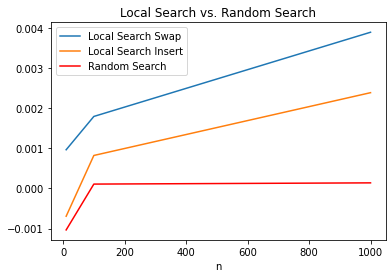

In [39]:
# Datuak gordetzeko egitura
datuak = pd.DataFrame({"n":list_budget,"Local Search Swap":list_fit_ls_swap,"Local Search Insert":list_fit_ls_ins,"Random Search":list_fit_rs}) 
print()
print(datuak)

#Irudikatu emaitzak plot batean.
ax = plt.gca()
datuak.plot(kind='line',x='n',y='Local Search Swap',ax=ax)
datuak.plot(kind='line',x='n',y='Local Search Insert',ax=ax)
datuak.plot(kind='line',x='n',y='Random Search', color='red', ax=ax,title='Local Search vs. Random Search')
plt.show()

## 2. EDA

https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=EDA+community+detection&btnG=

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7000750

https://ieeexplore.ieee.org/abstract/document/8711535?casa_token=mRcZrc_nHyAAAAAA:XFkC-HfhuOJ7wePqpFhDDcRQP9js3AkGEQ-yqYk9_DVWkLn3rCe1CLZdy8QH9-i7GWghAssK8PQ